In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

logging.getLogger("matplotlib.font_manager").disabled = True

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

df = pd.read_csv("./data/cleaned.csv")

In [2]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [3]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

ExtraTreesRegressor()

In [4]:
not_to_use = ["density", "residual sugar", "alcohol"]
og_data = X_train.loc[:, X_train.columns.difference(not_to_use)]

In [5]:
def plotting_hist(df):
    num_features = len(df.columns)

    nrows = 2
    ncols = (num_features + nrows - 1) // nrows

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))

    for idx, feature in enumerate(df.columns):
        row = idx // ncols
        col = idx % ncols
        ax = axes[row, col]

        data = df.loc[:, feature].values

        ax.hist(data, bins=1000, color="skyblue", edgecolor="black", alpha=0.7)
        title = ax.set_title(f"Histogram of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")

    total_subplots = nrows * ncols
    if total_subplots > num_features:
        for i in range(num_features, total_subplots):
            row = i // ncols
            col = i % ncols
            axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()

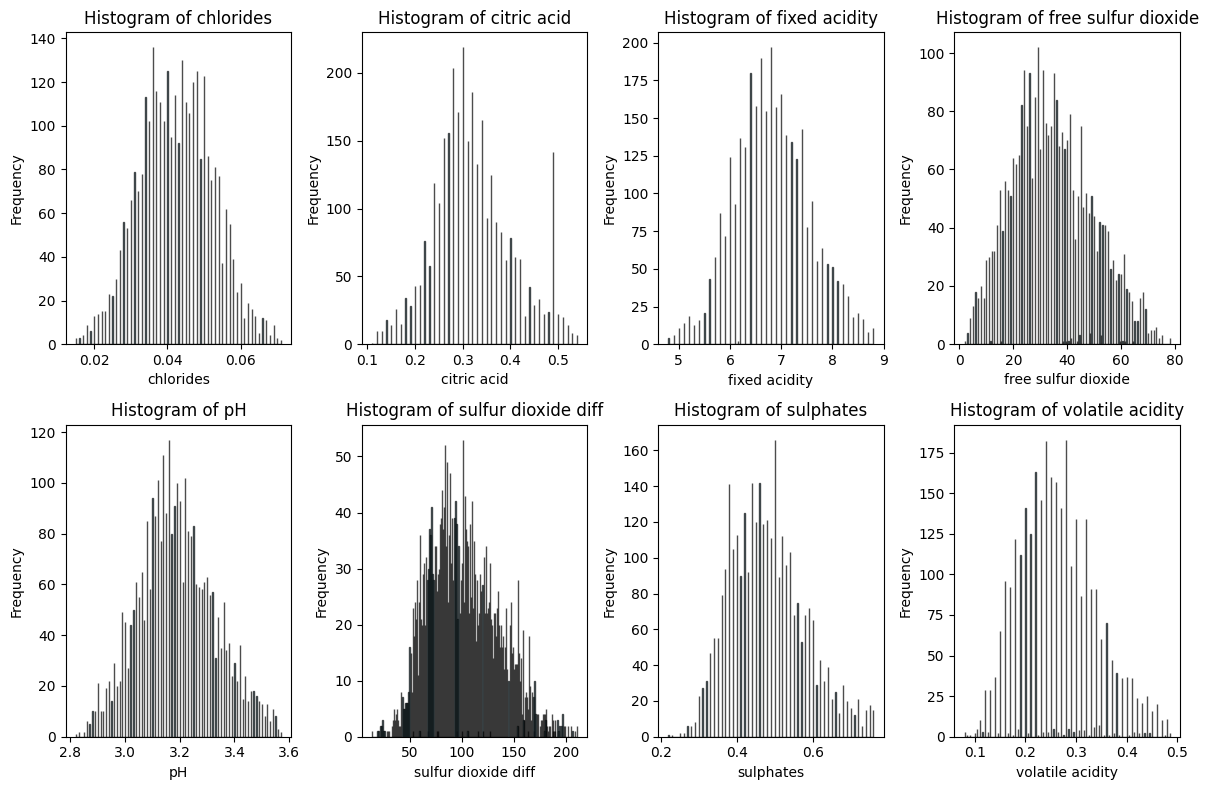

In [6]:
plotting_hist(og_data)